### Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação do Dataset

In [2]:
red_wines = pd.read_csv('datasets/red_wines.csv')

In [3]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29396 entries, 0 to 29395
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              29396 non-null  object 
 1   Price                    29396 non-null  float64
 2   Alcohol                  29396 non-null  float64
 3   ratings_average          29396 non-null  float64
 4   acidity                  29396 non-null  float64
 5   intensity                29396 non-null  float64
 6   sweetness                29396 non-null  float64
 7   tannin                   29396 non-null  float64
 8   vintage_ratings_average  29396 non-null  float64
 9   continent                29396 non-null  object 
 10  popular_wine             29396 non-null  int64  
 11  popular_vintage          29396 non-null  int64  
 12  rating_group             29396 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 2.9+ MB


In [4]:
red_wines.head(5)

,Description,Price,Alcohol,ratings_average,acidity,intensity,sweetness,tannin,vintage_ratings_average,continent,popular_wine,popular_vintage,rating_group
0,"This is a soft, richly layered and concentrate...",85.0,14.5,4.3,3.468246,3.143860,1.546160,2.078285,4.4,North America,0,0,4
1,A strong showing of black cherry and licorice ...,125.0,14.5,4.5,3.344858,4.749089,1.611013,3.312963,4.5,North America,1,0,4
2,This blended cuvée features the same attention...,52.0,14.2,4.2,3.883377,2.235860,1.453785,2.130269,4.2,North America,1,0,3
3,This stands apart from the other estate Pinots...,95.0,14.5,4.4,3.887788,2.400275,1.558072,2.328298,4.4,North America,0,0,3
4,This wine impresses immediately with its flavo...,100.0,14.4,4.3,3.627241,2.472972,1.557877,2.073915,4.5,North America,0,0,3


### Preprocessing
 1. Criação de dummies para o campo **continent**.
 2. Separação dos datasets entre treinamento e teste (train_test_split)
 3. Normalização dos valores usando StandardScaler

In [5]:
# 1
dummies = pd.get_dummies(red_wines['continent'], drop_first=True)
red_wines = pd.concat([red_wines, dummies], axis=1).drop('continent', axis=1)

In [6]:
# 2
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
description_countvectorizer = vectorizer.fit_transform(red_wines['Description'].values.astype('U'))
descriptions = pd.DataFrame(description_countvectorizer.toarray())

red_wines = pd.concat([red_wines, descriptions], axis=1).drop('Description', axis=1)

In [7]:
# 3
X = red_wines.drop('rating_group', axis=1)
y = red_wines['rating_group']

In [8]:
# 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_columns =['Price', 'Alcohol', 'ratings_average', 'acidity', 'intensity', 'sweetness',
                  'tannin', 'vintage_ratings_average']
X_train.loc[:, scaled_columns]= scaler.fit_transform(X_train.loc[:, scaled_columns])
X_test.loc[:, scaled_columns] = scaler.transform(X_test.loc[:, scaled_columns])

C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Dummy Classifier

In [9]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier()
dummy_model.fit(X_train, y_train)

dummy_pred = dummy_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

train_acc = accuracy_score(y_train, dummy_model.predict(X_train))
test_acc = accuracy_score(y_test, dummy_pred)
print('Acurácia (treinamento): {}'.format(train_acc))
print('Acurácia (teste): {}'.format(test_acc))

Acurácia (treinamento): 0.4491422461972105
Acurácia (teste): 0.4542465132101145


Text(0.5, 1.0, 'Matriz de confusão - modelo Dummy Classifier')

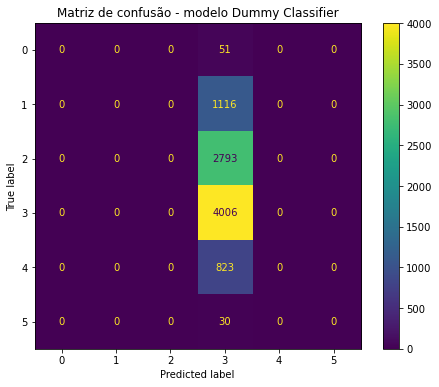

In [11]:
# Gráfico de matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(dummy_model,X_test,y_test, ax=ax)
plt.title('Matriz de confusão - modelo Dummy Classifier')

In [12]:
# Classification Report
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00      1116
           2       0.00      0.00      0.00      2793
           3       0.45      1.00      0.62      4006
           4       0.00      0.00      0.00       823
           5       0.00      0.00      0.00        30

    accuracy                           0.45      8819
   macro avg       0.08      0.17      0.10      8819
weighted avg       0.21      0.45      0.28      8819



C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression(max_iter=10000)


#### GridSearch - busca pelos melhores hiperparâmetros

In [14]:
# Parâmetros
C = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=C)

In [15]:
from sklearn.model_selection import GridSearchCV

log_model = GridSearchCV(base_model,param_grid=param_grid, verbose=4)
log_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................................C=0.001; total time= 1.8min
[CV 2/5] END ........................................C=0.001; total time= 1.8min
[CV 3/5] END ........................................C=0.001; total time= 1.8min
[CV 4/5] END ........................................C=0.001; total time= 1.8min
[CV 5/5] END ........................................C=0.001; total time= 1.8min
[CV 1/5] END .........................................C=0.01; total time= 3.0min
[CV 2/5] END .........................................C=0.01; total time= 2.9min
[CV 3/5] END .........................................C=0.01; total time= 3.1min
[CV 4/5] END .........................................C=0.01; total time= 3.0min
[CV 5/5] END .........................................C=0.01; total time= 3.1min
[CV 1/5] END ..........................................C=0.1; total time= 5.8min
[CV 2/5] END ....................................

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, verbose=4)

In [16]:
log_model.best_params_

{'C': 0.1}

In [17]:
# Resultados
print("Best: {} using {}".format(log_model.best_score_, log_model.best_params_))
means = log_model.cv_results_['mean_test_score']
stds = log_model.cv_results_['std_test_score']
params = log_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.6763873666112861 using {'C': 0.1}
0.5935270001074548 (0.005485315845125186) with: {'C': 0.001}
0.6562188041333527 (0.006171990137814158) with: {'C': 0.01}
0.6763873666112861 (0.009531377273418165) with: {'C': 0.1}
0.6609328619488066 (0.008810851857543935) with: {'C': 1}
0.6273029531201477 (0.00631317619618868) with: {'C': 10}
0.5921665975885233 (0.0073571881069801745) with: {'C': 100}


#### Avaliação do modelo

In [18]:
log_pred = log_model.predict(X_test)

train_acc = accuracy_score(y_train, log_model.predict(X_train))
test_acc = accuracy_score(y_test, log_pred)
print('Acurácia (treinamento): {}'.format(train_acc))
print('Acurácia (teste): {}'.format(test_acc))

Acurácia (treinamento): 0.7952082422121787
Acurácia (teste): 0.689987526930491


Text(0.5, 1.0, 'Matriz de confusão - Logistic Regression Model')

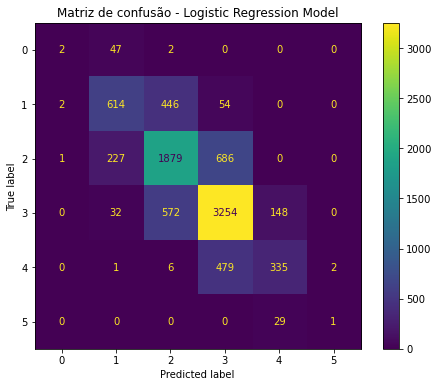

In [22]:
# Gráfico de matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(log_model,X_test,y_test, ax=ax)
plt.title('Matriz de confusão - Logistic Regression Model')

In [20]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.40      0.04      0.07        51
           1       0.67      0.55      0.60      1116
           2       0.65      0.67      0.66      2793
           3       0.73      0.81      0.77      4006
           4       0.65      0.41      0.50       823
           5       0.33      0.03      0.06        30

    accuracy                           0.69      8819
   macro avg       0.57      0.42      0.44      8819
weighted avg       0.68      0.69      0.68      8819



#### Exportação do modelo

In [21]:
import joblib
joblib.dump(log_model, 'models/log_model-cv2.joblib')

['models/log_model-cv2.joblib']